In [1]:
import ast
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import fits
from astropy import table
from numpy import trapz

import pandas as pd
import matplotlib as mpl


In [3]:
mpl.matplotlib_fname()


'/opt/homebrew/lib/python3.11/site-packages/matplotlib/mpl-data/matplotlibrc'

In [2]:
def grab_values(file):
  empty = []
  #z open file and read the content in a list
  with open(file, 'r') as fp:
      for line in fp:
          x = line[:-1]

          empty.append(float(x))
  return empty

In [3]:
def grab(file):
    new_file = fits.open(file)
    tab = table.Table(new_file[1].data).to_pandas()
    print(tab)
    dt_init = (np.round(tab["TIME"][0]) - 100)/1000
    print(dt_init)
    init = tab["TIME"][0]
    print(init)

    tab = tab.dropna()

    dt = tab["TIME"]
    dt = [i/1000 for i in dt]

    rate = tab["NET_RATE"]
    erate = tab["ERR_RATE"]

    print(dt[0]*1000-init)
    return dt, rate, erate, dt_init




In [4]:
(13.076 + 5.153/2) - (4.5835373 + 7.133)/2

9.79423135

In [8]:
9.79423135 / 44.4942981792

0.2201232910912294

    TIME_BIN      TIME_MIN          TIME      TIME_MAX  COUNTS  STAT_ERR   
0          1  7.460999e+08  7.461000e+08  7.461001e+08       0  0.000000  \
1          2  7.461001e+08  7.461002e+08  7.461003e+08       0  0.000000   
2          3  7.461003e+08  7.461004e+08  7.461005e+08       0  0.000000   
3          4  7.461005e+08  7.461006e+08  7.461007e+08       0  0.000000   
4          5  7.461007e+08  7.461008e+08  7.461009e+08       0  0.000000   
5          6  7.461009e+08  7.461010e+08  7.461011e+08       0  0.000000   
6          7  7.461011e+08  7.461012e+08  7.461013e+08       0  0.000000   
7          8  7.461013e+08  7.461014e+08  7.461015e+08       7  2.645751   
8          9  7.461015e+08  7.461016e+08  7.461017e+08       9  3.000000   
9         10  7.461017e+08  7.461018e+08  7.461019e+08       9  3.000000   
10        11  7.461019e+08  7.461020e+08  7.461021e+08       9  3.000000   
11        12  7.461021e+08  7.461022e+08  7.461023e+08       7  2.645751   
12        13

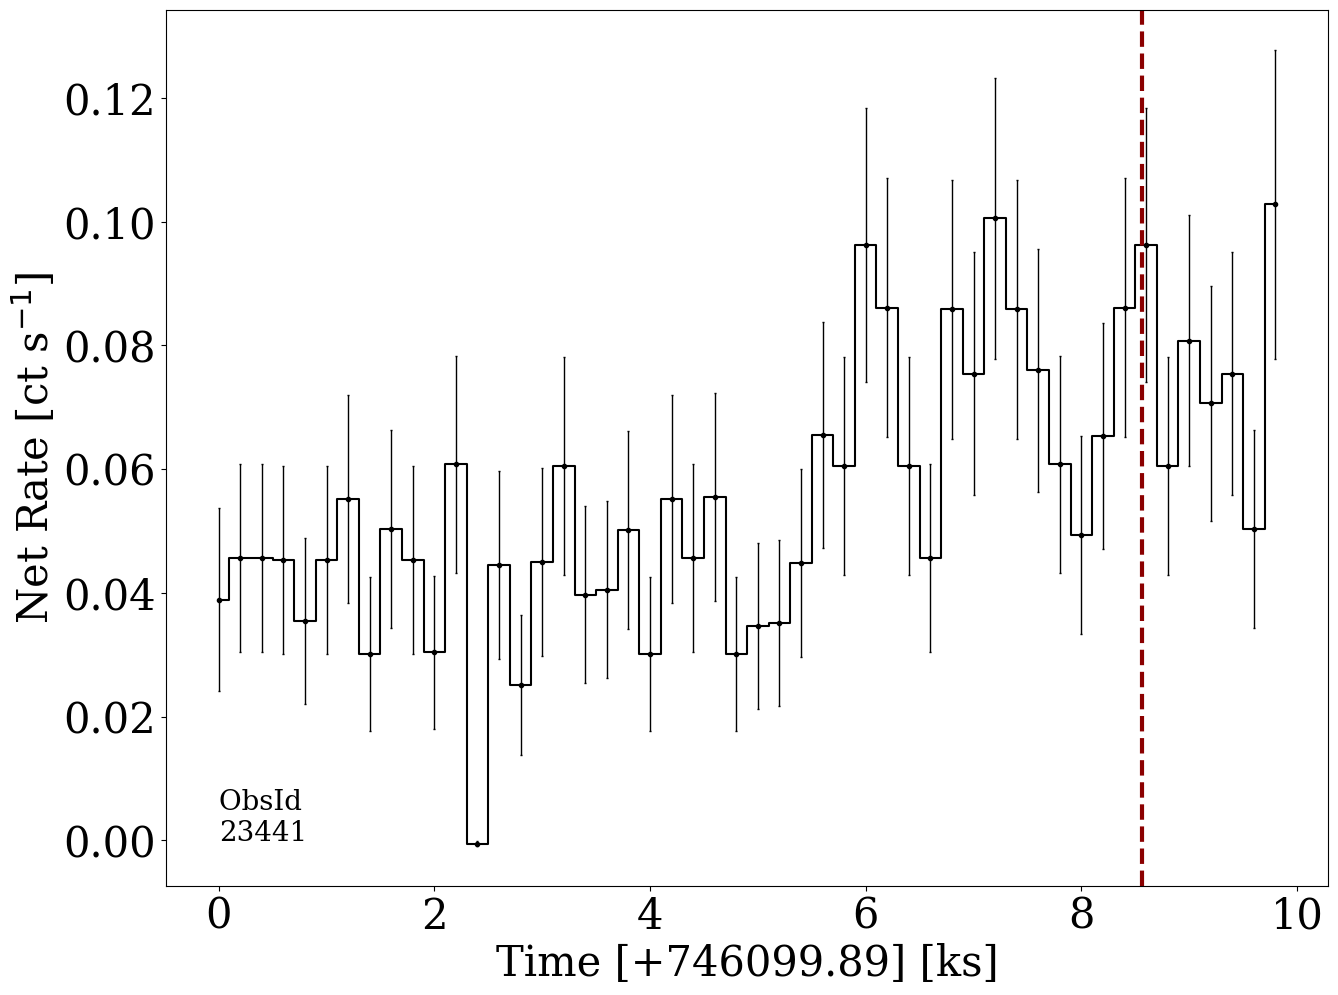

746107290.0


In [16]:
obsid = 23441
data_dir = f"/Users/caleb/AstroPythonPrograms/codes/hr/{obsid}/primary/"
dt, rate, erate, dt_init = grab(data_dir+f'{obsid}_src2_sub_lc.fits')
plt.rcParams.update({
            'font.sans-serif': 'Times New Roman',
            'font.family': 'serif'
            })
dt = np.array(dt) - dt[0]


plt.errorbar(dt,rate,yerr=erate,fmt ='.',color = "black",linewidth = 1,capsize = 1)
start =54
stop=67
plt.step(dt,rate,where='mid',color='black')
plt.rcParams["figure.figsize"] = (15,12)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)


if obsid == 23441:
    plt.axvline(x=8560/1000,color='darkred',ls='--',linewidth=3)

if obsid == 21218:
    plt.axvline(x=8403/1000,color='darkred',ls='--',linewidth=3)
if obsid == 23443:
    plt.axvline(x=4583.5373/1000,color='darkred',ls='--',linewidth=3)
    plt.axvline(x=7133/1000,color='darkred',ls='--',linewidth=3)
if obsid == 23444:
    plt.axvline(x=10567/1000,color='darkred',ls='--',linewidth=3)
    plt.axvline(x=13117/1000,color='darkred',ls='--',linewidth=3)







# plt.axvline(x=13200,color='black',ls='--')

plt.xlabel(f"Time [+{dt_init}] [ks]")
plt.ylabel(r"Net Rate [ct s$^{-1}$]")
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.gcf().subplots_adjust(bottom=0.15)
# or
plt.subplots_adjust(bottom=0.15)

plt.text(0, 0, f'ObsId \n{obsid}', fontsize=20)

plt.savefig(f'Lightcurve - {obsid}')

plt.rcParams.update({'font.size': 30,
                     'xtick.labelsize' : 25,
                     'ytick.labelsize' : 25,
                     'figure.figsize' : (15,12),
                     'font.sans-serif': 'Times New Roman',
                     'font.family': 'serif'

})

plt.show()

print(5800+dt_init*1000+200+1400.0)

# obs 21218: 8403
#obs 23441: 8560.335742

# chunk_edges_times = bayesian_blocks(times,fitness='events',ncp_prior=prior)


In [ ]:
676743438.617

In [11]:
n=12778
ingress_time = 52066.259473 + n*0.514980311
egress_time = 52066.289497 + n*0.514980275
print(ingress_time,egress_time)

58646.677886958 58646.707450949994


In [31]:
rate = np.array(rate)
erate = np.array(erate)

In [6]:
len(rate[65:92])

27

In [29]:
#23444
if obsid == 23444:
    dip = rate[rate < .05]
    baseline = rate[65:75].tolist() + rate[43:53].tolist()

    dip_indices = np.where(rate < .05)


    dip_error = np.sqrt(sum((erate[53:65])**2) / (len(erate[53:65]))**2)
    baseline_error = np.sqrt(  (sum((erate[65:75])**2)+sum((erate[43:53])**2)) / (20)**2   )

    print('dip errors:',dip_error)
    print('base errors:',baseline_error)

    print(np.mean(baseline))
    print(np.std(baseline))
    print('depth: ',1 - np.mean(rate[rate < .05])/np.mean(rate[rate >= .05]))
    print("SNR:")
    print((np.mean(baseline)-np.mean(dip))/(np.std(dip)**2+np.std(baseline)**2)**.5)
if obsid == 21218:
    dip = rate[rate < .1]
    baseline = rate[-23:-13]

    dip_error = erate[-10:]

    baseline_error = erate[-23:-13]

    dip_errored = np.sqrt(sum((dip_error)**2) / (len(dip_error))**2)
    baseline_errored = np.sqrt(sum((baseline_error)**2) / (len(baseline_error))**2)

    print('dip errors:',dip_errored)
    print('base errors:',baseline_errored)



    print(np.mean(rate[rate < .1]))
    print(np.mean(baseline))
    print("SNR:")
    print((np.mean(baseline)-np.mean(dip))/(np.std(dip)**2+np.std(baseline)**2)**.5)

if obsid == 23443:
    dip = rate[22:35]
    # dip_observed = rate[65:92]
    # baseline = rate[:22].tolist()+rate[35:65].tolist()+rate[92:].tolist()
    baseline = rate[12:22].tolist()+rate[35:45].tolist()

    baseline_error= np.array(erate[12:22].tolist()+erate[35:45].tolist())

    dip_errored = np.sqrt(sum((erate[65:92])**2) / (len(erate[65:92]))**2)
    baseline_errored = np.sqrt(sum((baseline_error)**2) / (len(baseline_error))**2)

    print('dip errors:',dip_errored)
    print('base errors:',baseline_errored)


    print(np.std(baseline))
    print(np.mean(baseline))
    print("SNR:")
    print((np.mean(baseline)-np.mean(dip_observed))/(np.std(dip_observed)**2+np.std(baseline)**2)**.5)

if obsid == 23441:
    dip = rate[:28]
    dip_expected = rate[-6:] 
    baseline = rate[28:38]


    baseline_error= np.array(erate[28:38].tolist())

    dip_errored = np.sqrt(sum((erate[-6:])**2) / (len(erate[-6:]))**2)
    baseline_errored = np.sqrt(sum((baseline_error)**2) / (len(baseline_error))**2)

    print('dip errors:',dip_errored)
    print('base errors:',baseline_errored)

    print(np.std(baseline))
    print(np.mean(baseline))
    print("SNR:")
    print((np.mean(baseline)-np.mean(dip_expected))/(np.std(dip_expected)**2+np.std(baseline)**2)**.5)




dip errors: 0.00806921579062052
base errors: 0.006223430638540107
0.016788666794344907
0.07621153335444164
SNR:
0.1184983193468965


In [8]:
low = np.min(rate[22:35])
high = np.max(rate[22:35])

In [14]:
rate[:65].tolist()+rate[92:].tolist()

[0.0926021876301835,
 0.06570556289045103,
 0.11117063354459568,
 0.09607430512675735,
 0.09099417236306376,
 0.04543305512675745,
 0.10610650854459569,
 0.09601027407198293,
 0.060529383544595784,
 0.0707216645993702,
 0.0707376723630638,
 0.0707376723630638,
 0.05544925078090219,
 0.060577406835676605,
 0.060529383544595784,
 0.050529195654144654,
 0.04532100078090221,
 0.040176836962434195,
 0.07067364130828938,
 0.06552947748982135,
 0.04543305512675745,
 0.055465258544595795,
 0.04538503183567664,
 0.03528879736306387,
 0.03525678183567666,
 0.06567354736306381,
 0.05051318789045105,
 0.04030489907198304,
 0.05040113354459581,
 0.06060942236306381,
 0.06059341459937021,
 0.045353016308289425,
 0.040176836962434195,
 0.04544906289045106,
 0.04030489907198304,
 0.060561399071983,
 0.05043314907198302,
 0.06060942236306381,
 0.030080602489821424,
 0.02508050854459586,
 0.0554812663082894,
 0.045304993017208604,
 0.04538503183567664,
 0.04036893012675746,
 0.09097816459937015,
 0.0757

In [19]:
baseline = rate[:22].tolist()+rate[35:65].tolist()+rate[92:].tolist()

print(np.mean(rate[65:92]))
print(np.std(rate[65:92]))

0.01178507908137255
0.010951583553914263


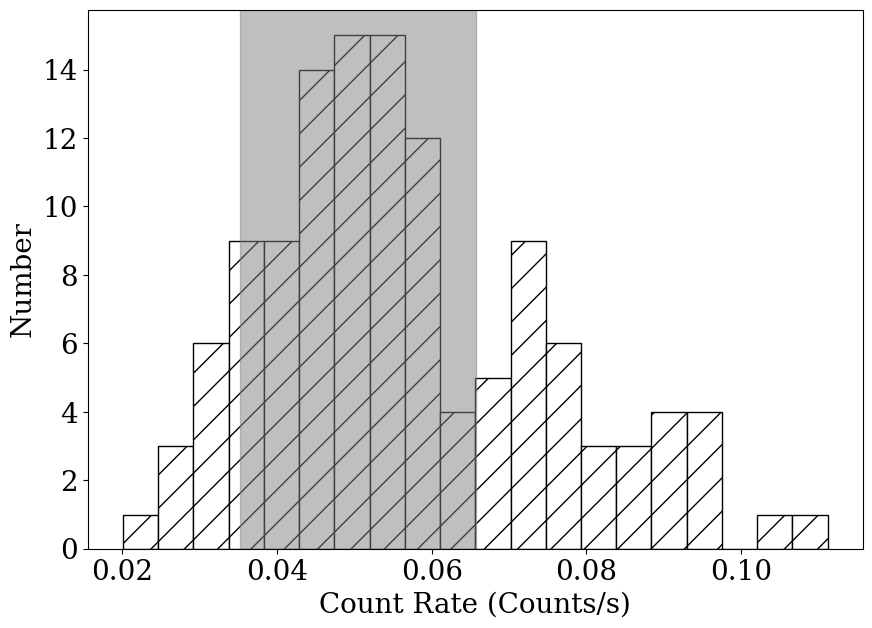

In [15]:
# bins for dip 23443: 65-92
# expected: 22-35
plt.hist(rate[:65].tolist()+rate[92:].tolist(),bins=20,facecolor='white',
         hatch='/', edgecolor='k',fill=True)
plt.axvspan(low,high,color='grey',alpha=.5)
plt.xlabel("Count Rate (Counts/s)",fontsize=20)
plt.ylabel("Number",fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=20)


In [ ]:
np.mean(rate[:54] + rate[67:])

0.1951835259345956

In [51]:
np.mean(rate[:65]+rate[92:])

nan

In [64]:
np.mean(rate[:65].tolist() + rate[92:].tolist())

0.0569335176670986

In [61]:
rate[92:]

97     0.055513
98     0.080930
99     0.070738
100    0.045353
101    0.055497
102    0.070626
103    0.085930
104    0.040353
105    0.035321
106    0.060657
107    0.050497
108    0.055529
109    0.095914
110    0.065642
111    0.045273
112    0.070690
113    0.070738
114    0.050449
115    0.035289
116    0.050513
117    0.040385
118    0.050353
119    0.055513
120    0.055369
121    0.035257
122    0.035337
123    0.030129
124    0.075738
125    0.030177
126    0.055465
127    0.035273
128    0.045433
129    0.055481
130    0.055433
131    0.085882
132    0.050545
133    0.065626
134    0.050449
135    0.020112
136    0.065658
137    0.065578
138    0.055465
139    0.035289
140    0.030273
141    0.075786
142    0.080770
143    0.065529
144    0.075674
145    0.050529
146    0.080754
147    0.060593
148    0.040273
149    0.050449
150    0.050417
151    0.030145
152    0.030241
153    0.050465
154    0.060497
155    0.028682
Name: NET_RATE, dtype: float64

In [40]:
times_abs = np.loadtxt("/Users/caleb/astropythonprograms/codes/hr/21218/primary/times21218.txt")
times =  times_abs - times_abs[0]
x = [1]*len(times)

In [41]:
bins = np.arange(0,29945,3.24104)
print(bins)

[0.00000000e+00 3.24104000e+00 6.48208000e+00 ... 2.99374865e+04
 2.99407275e+04 2.99439686e+04]


In [42]:
binned = [0] * len(bins)
for time in times:

    for number, bin in enumerate(bins):
        if time < bin:
            binned[number] = binned[number] + 1
            break



In [43]:
# spread out 2s to bin over
for row, i  in enumerate(binned):
    if i == 2:
        binned[row+1] =binned[row+1] + 1
        binned[row] = 1 

binned = np.array(binned)


In [44]:
binned = np.flip(binned)

In [52]:
times_abs[0] + (len(binned)-6630-first)*3.24104

676743405.5861146

In [49]:
times_abs[-1]

676745274.9475983

In [53]:
676745274.9475983 - 676743405.5861146

1869.3614836931229

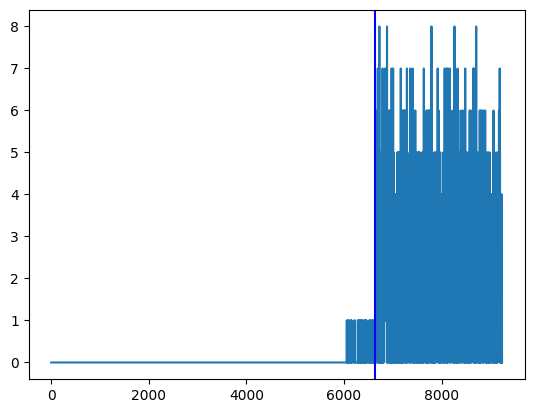

In [51]:
plt.plot(binned)
# for 23443
# plt.xlim(5200,8000) 
# line = 5585

# # for 23444

# plt.xlim(4000,4400) 
# line = 4055

#
# 21218
# plt.xlim(6500,7000)
line = 6630
plt.axvline(x=line,color='b')

In [46]:
def get_first_nonzero(line):
    sample = binned[line:]
    first = 0
    for row,i in enumerate(sample):
        if i > 0:
            first = row
            break
    print(first)
    return first

In [47]:
first = get_first_nonzero(line)

6


In [30]:
# count rate outside eclipse

def prob(k):

    rbar = .22
    rsigma = .002
    unobscured_start = line + first


    a_total = 0
    for r in np.arange(rbar-5*rsigma,rbar+5*rsigma,.001):
        product = 1
        sum = 0
        for row,i in enumerate(binned[unobscured_start:unobscured_start+k]):
            if i >= 1:
                product = ((row+.5)/(k))*(product)
            if i == 0:
                sum += (k-row-.5)/(k)

        a = product * np.exp(r*3.24104*sum)*np.exp((-(r-rbar)**2)/(2*rsigma**2))
        a_total += a
    return a_total

In [31]:
all_probs = []
k_values = np.arange(0,20,1)
for k in k_values:
    a = prob(k)
    all_probs.append(a)

all_probs = all_probs/max(all_probs)

# now we normalize




In [411]:
all_probs

array([4.47538014e-04, 2.23769007e-04, 1.97285207e-04, 1.93262566e-04,
       1.91688973e-04, 2.71416741e-04, 4.67091590e-04, 9.07385034e-04,
       1.55624209e-03, 2.44115129e-03, 4.24657734e-03, 6.87843462e-03,
       1.05257735e-02, 1.75082941e-02, 3.11526756e-02, 5.85861806e-02,
       1.15386061e-01, 2.36296662e-01, 5.00310669e-01, 1.00000000e+00])

Text(0, 0.5, 'Prob')

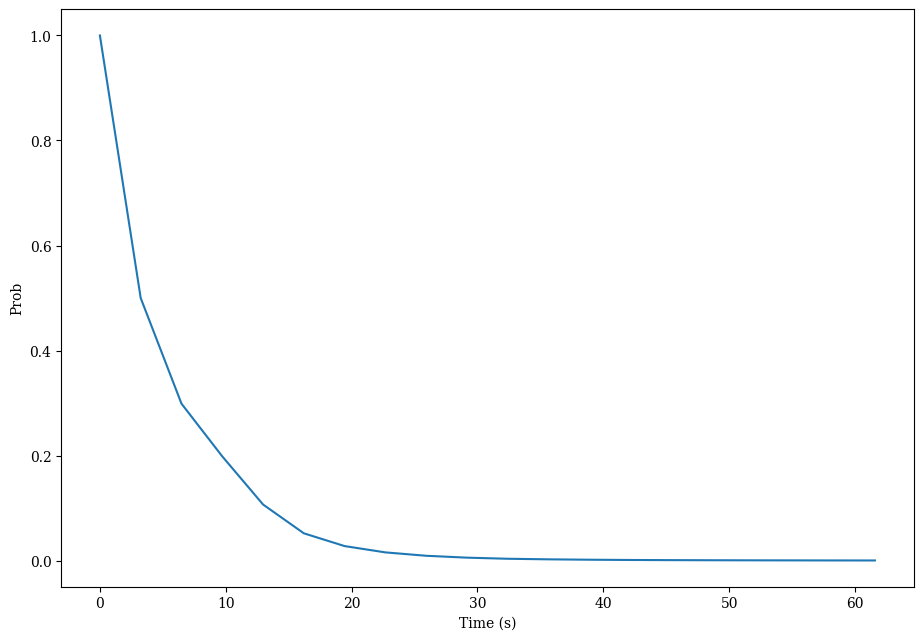

In [32]:

plt.plot([k*3.24104 for k in k_values],all_probs)

plt.xlabel("Time (s)")
plt.ylabel("Prob")

2.9113038705571275


Text(0.5, 1.0, 'Ingress 21218')

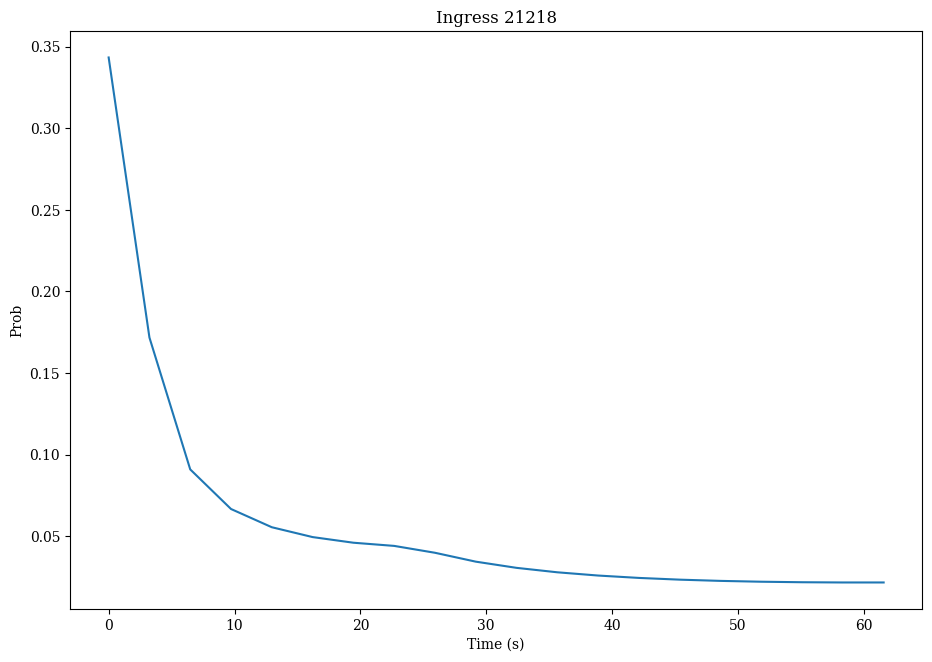

In [55]:
# normalize so area = 1
egress_times = [k*3.24104 for k in k_values]
area = trapz(all_probs)

print(area)


plt.plot([k*3.24104 for k in k_values],[i/area for i in all_probs])

plt.xlabel("Time (s)")
plt.ylabel("Prob")
plt.title("Ingress 21218")